# You have the right idea on how these homeworks should look: your presentation is fine, you comment on althe steps and try and interpret the result. But you are getting confused and adding a lot of useless lines of code, which cause you to make mistakes: you already had the data read in, you reread it and you read the wrong ata (index 2 instead of 1 gave you standard deviations instead of means, you created a line, from a fit, the you fit the line again to make the plot, when all you have to do is plot it!)

# In coding 99% of the times less is more. 
https://www.python.org/dev/peps/pep-0020/


# In the conclusions, though you have some good points, you missed the covariance of race and income which invalidates the first part of the analysis (and perhaps the second too)

# look for more comments int he cells containing FBB


In [2]:
from __future__ import print_function, division
import sys
import os
import numpy 
import pylab as pl
import pandas as pd

import json

from scipy import stats
import itertools

%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Importing Data

Here we imported the specified data by age and race.

In [3]:
url = "http://cosmo.nyu.edu/~fb55/PUI2016/data/"
keys = ['all', 'white', 'black', 'asian', 'hisp']
data_m = ['pinc08_2_1_1.xls', 'pinc08_2_1_4.xls', 'pinc08_2_1_6.xls', 'pinc08_2_1_8.xls', 'pinc08_2_1_9.xls']
all_males ={}

def male_income(key, data):
    for i in range(0, len(keys)): 
        all_males[key[i]] = pd.read_excel(url + data_m[i], header = 9)
male_income(keys, data_m)

In [4]:
all_males['white'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,73333,2913,1564,1632,2092,2479,1933,2930,2298,...,411,493,357,9669,40122,274,56368,593,0.493,0.0038
2,Earnings,55244,2195,1490,1480,1092,1830,771,1752,937,...,198,452,181,8048,44882,597,60075,707,0.483,0.0046
3,..Wages and Salary,51442,1859,1382,1407,976,1575,671,1575,866,...,197,436,181,7459,45554,309,60447,744,0.476,0.0049
4,..Nonfarm Self-Employment,4970,1041,204,221,157,397,96,236,89,...,0,14,0,413,20445,864,35925,1622,0.631,0.0099


In [5]:
data_f = ['pinc08_3_1_1.xls', 'pinc08_3_1_4.xls', 'pinc08_3_1_6.xls', 'pinc08_3_1_8.xls', 'pinc08_3_1_9.xls']
all_females ={}

def female_income(key, data):
    for i in range(0, len(keys)): 
        all_females[key[i]] = pd.read_excel(url + data_f[i], header = 9)
female_income(keys, data_f)

In [6]:
all_females['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Value\n(Dol.),Standard\nerror (Dol.),Value\n(Dol.),Standard\nerror (Dol.),Ratio,Standard\nerror
1,....Total,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,Earnings,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032
3,..Wages and Salary,71220,3835,2954,3005,2411,4309,1941,3908,2484,...,61,233,126,3370,28402,379,36412,316,0.461,0.0032
4,..Nonfarm Self-Employment,4694,1282,288,410,253,388,84,265,126,...,0,0,0,127,10732,399,20942,1123,0.65,0.0162


In [7]:
type(all_males)

dict

In [8]:
type(all_females)

dict

In [9]:
all_females['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [10]:
for k,v in all_females.items():
    print("#####", k)
    print(v.describe())
for k,v in all_males.items():
    print("#####", k)
    print(v.describe())

##### asian
       Total with Income  $1 to $2,499 or loss  $2,500 to $4,999  \
count          46.000000             46.000000         46.000000   
mean          809.478261            150.347826         42.413043   
std          1476.967354            439.113765         59.593652   
min             2.000000              0.000000          0.000000   
25%            26.500000              2.000000          2.250000   
50%           147.500000             22.500000         13.000000   
75%           804.250000             62.500000         53.000000   
max          5648.000000           2178.000000        224.000000   

       $5,000 to $7,499  $7,500 to $9,999  $10,000 to $12,499  \
count         46.000000         46.000000           46.000000   
mean          53.934783         59.434783           56.717391   
std           82.427989         95.528623           93.491215   
min            0.000000          0.000000            0.000000   
25%            0.000000          2.000000         

In [11]:
print (all_males['asian'].shape)
all_males['asian'].applymap(np.isreal).sum()

(49, 49)


Characteristic           1
Total with Income       49
$1 to $2,499 or loss    49
$2,500 to $4,999        49
$5,000 to $7,499        49
$7,500 to $9,999        49
$10,000 to $12,499      49
$12,500 to $14,999      49
$15,000 to $17,499      49
$17,500 to $19,999      49
$20,000 to $22,499      49
$22,500 to $24,999      49
$25,000 to $27,499      49
$27,500 to $29,999      49
$30,000 to $32,499      49
$32,500 to $34,999      49
$35,000 to $37,499      49
$37,500 to $39,999      49
$40,000 to $42,499      49
$42,500 to $44,999      49
$45,000 to $47,499      49
$47,500 to $49,999      49
$50,000 to $52,499      49
$52,500 to $54,999      49
$55,000 to $57,499      49
$57,500 to $59,999      49
$60,000 to $62,499      49
$62,500 to $64,999      49
$65,000 to $67,499      49
$67,500 to $69,999      49
$70,000 to $72,499      49
$72,500 to $74,999      49
$75,000 to $77,499      49
$77,500 to $79,999      49
$80,000 to $82,499      49
$82,500 to $84,999      49
$85,000 to $87,499      49
$

In [12]:
for gender in [all_males, all_females]:
    for k in gender:
        # find non real values in the dataframe with applymap
        isreal  = gender[k].applymap(np.isreal)
        for c in gender[k].columns :
            #if some but not all values in column are real
            #replace the non real ones
            if isreal.sum()[c] > 0 and \
            isreal.sum()[c] < gender[k].shape[0]:
                gender[k][c][~isreal[c]] =  np.nan
                gender[k][c] = gender[k][c].astype(float)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


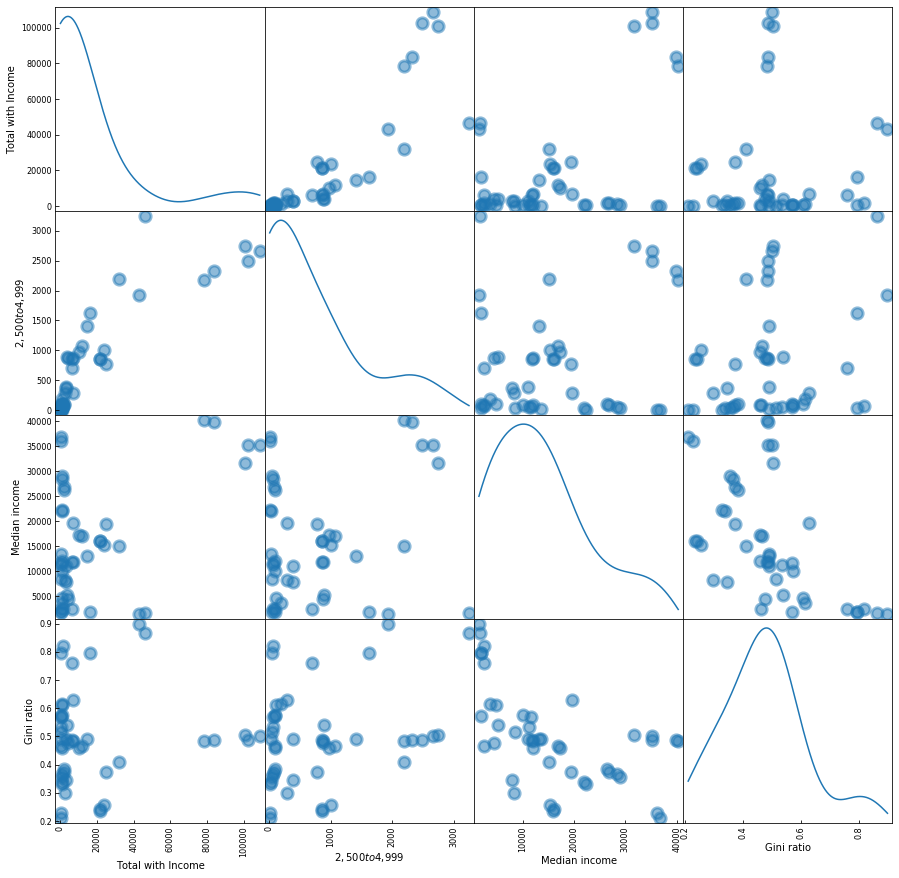

In [13]:
fig = pd.scatter_matrix(all_males['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

### Description of above plot: Male Dataframe Scatterplots

The above dataframe scatterplots compare several subsets of male-only income data against each other. Each dot represents one of the characteristics in the data, and each of these characteristics has been subdivided. This plot looks at 4 subsets in particular: total with income, total making USD 2500-4000 annually, median income, and the Gini Ratio (which is a measure of inequality, or income disparity). Some of these plots don't appear to have any correlation, while others do, namely: the higher the income, the lower the Gini Ratio (and the less income disparity that exists); the larger the group size, the less variation there is in the Gini Ratio; and while it appears some large numbers are clustered together in the lower income groups, when looking at the narrow USD 2500-4000 income range there really aren't many people there in comparison.

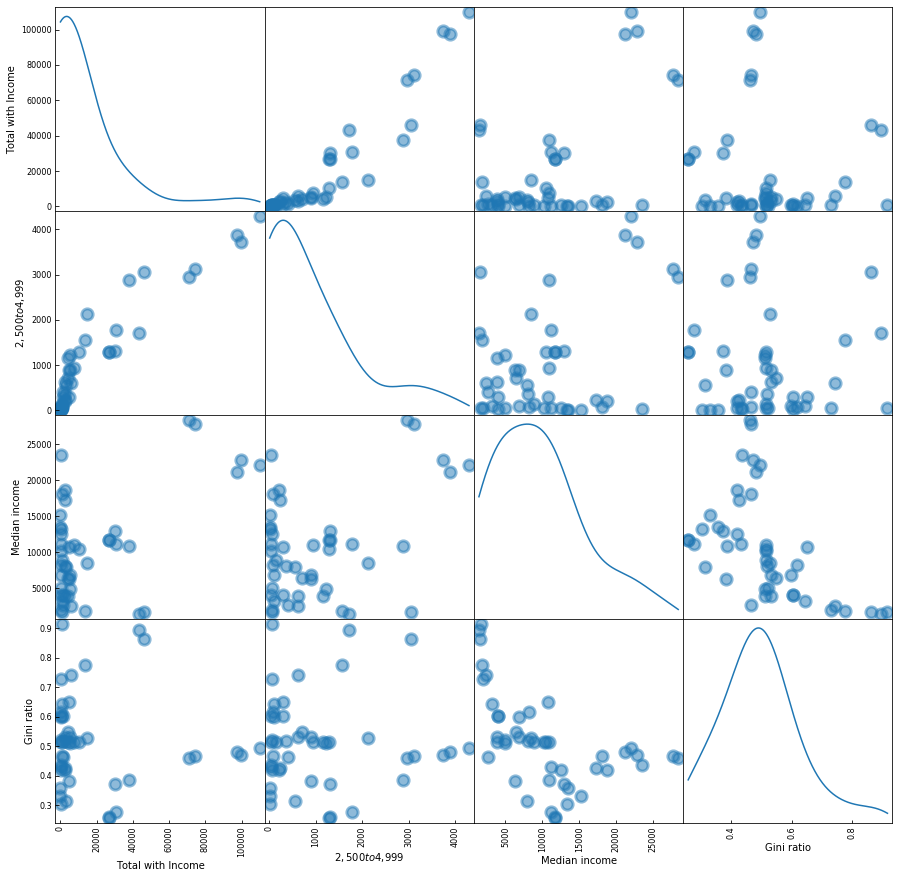

In [14]:
fig2 = pd.scatter_matrix(all_females['all']
                   [[u'Total with Income',u'$2,500 to $4,999',
                     u'Median income',u'Gini ratio']],
                   linewidth= 3, s=500, figsize=(15,15), 
                        diagonal='kde') 

### Description of above plot: Female Dataframe Scatterplots

Like the male scatterplots, the above dataframe scatterplots compare several subsets of female-only income data against each other. Again, each dot represents one of the characteristics in the data, and each of these characteristics has been subdivided. This plot looks at 4 subsets in particular: total with income, total making USD 2500-4000 annually, median income, and the Gini Ratio (which is a measure of inequality, or income disparity). This data appears very similar to the male data - Some of these plots don't appear to have any correlation, while others do, namely: the higher the income, the lower the Gini Ratio (and the less income disparity that exists); the larger the group size, the less variation there is in the Gini Ratio; and while it appears some large numbers are clustered together in the lower income groups, when looking at the narrow USD 2500-4000 income range there really aren't many people there in comparison.

# Median Incomes
## Characteristic: 'Earnings'

In [15]:
all_females['all'].columns

Index(['Characteristic', 'Total with Income', '$1 to $2,499 or loss',
       '$2,500 to $4,999', '$5,000 to $7,499', '$7,500 to $9,999',
       '$10,000 to $12,499', '$12,500 to $14,999', '$15,000 to $17,499',
       '$17,500 to $19,999', '$20,000 to $22,499', '$22,500 to $24,999',
       '$25,000 to $27,499', '$27,500 to $29,999', '$30,000 to $32,499',
       '$32,500 to $34,999', '$35,000 to $37,499', '$37,500 to $39,999',
       '$40,000 to $42,499', '$42,500 to $44,999', '$45,000 to $47,499',
       '$47,500 to $49,999', '$50,000 to $52,499', '$52,500 to $54,999',
       '$55,000 to $57,499', '$57,500 to $59,999', '$60,000 to $62,499',
       '$62,500 to $64,999', '$65,000 to $67,499', '$67,500 to $69,999',
       '$70,000 to $72,499', '$72,500 to $74,999', '$75,000 to $77,499',
       '$77,500 to $79,999', '$80,000 to $82,499', '$82,500 to $84,999',
       '$85,000 to $87,499', '$87,500 to $89,999', '$90,000 to $92,499',
       '$92,500 to $94,999', '$95,000 to $97,499', '$97,500 

In [16]:
all_females['all'].head()

,Characteristic,Total with Income,"$1 to $2,499 or loss","$2,500 to $4,999","$5,000 to $7,499","$7,500 to $9,999","$10,000 to $12,499","$12,500 to $14,999","$15,000 to $17,499","$17,500 to $19,999",...,"$92,500 to $94,999","$95,000 to $97,499","$97,500 to $99,999","$100,000 and over",Median income,Unnamed: 44,Mean income,Unnamed: 46,Gini ratio,Unnamed: 48
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,109956,7590,4298,5557,7874,8052,5720,6768,4377,...,167,285,184,4442,22063,137,31968,250,0.495,0.0025
2,NaN,74545,4198,3118,3269,2662,4579,1994,4134,2585,...,60,236,127,3535,27736,364,36189,307,0.466,0.0032
3,NaN,71220,3835,2954,3005,2411,4309,1941,3908,2484,...,61,233,126,3370,28402,379,36412,316,0.461,0.0032
4,NaN,4694,1282,288,410,253,388,84,265,126,...,0,0,0,127,10732,399,20942,1123,0.650,0.0162


In [17]:
m_white_inc = average(all_males['white'][[u'Median income']])
m_white_inc

nan

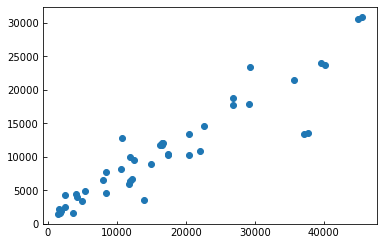

In [18]:
median = pl.scatter(all_males['white'][u'Median income'], all_females['white'][u'Median income'])

# FBB missinc caption. there should be no figures or outpus (see the cell below) that are not explained in your delivery ready notebook

In [19]:
all_females['all'].ix[2]['Median income']

27736.0

# FBB YOU READ IN THE WRONG DATA! YOU WANTED mean WHICH IS INDEX 1, BUt YOU TOOK INDEX 2 WHICH IS stdev!

In [20]:
#median earnings
m_white_inc = all_males['white'].ix[2]['Median income']
f_white_inc = all_females['white'].ix[2]['Median income']
m_black_inc = all_males['black'].ix[2]['Median income']
f_black_inc = all_females['black'].ix[2]['Median income']
m_asian_inc = all_males['asian'].ix[2]['Median income']
f_asian_inc = all_females['asian'].ix[2]['Median income']
m_hisp_inc = all_males['hisp'].ix[2]['Median income']
f_hisp_inc = all_females['hisp'].ix[2]['Median income']
m_inc = all_males['all'].ix[2]['Median income']
f_inc = all_females['all'].ix[2]['Median income']

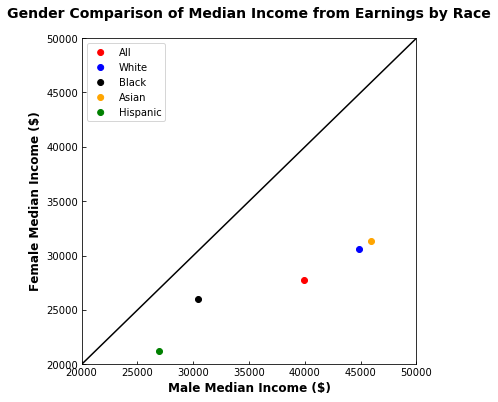

In [21]:
#m_inc = (m_white_inc, m_black_inc, m_asian_inc, m_hisp_inc)
#f_inc = (f_white_inc, f_black_inc, f_asian_inc, f_hisp_inc)

pl.figure(figsize = (6, 6))
pl.scatter(m_inc, f_inc, label = "All", color = 'red')
pl.scatter(m_white_inc, f_white_inc, label = "White", color = 'blue')
pl.scatter(m_black_inc, f_black_inc, label = "Black", color = 'black')
pl.scatter(m_asian_inc, f_asian_inc, label = "Asian", color = 'orange')
pl.scatter(m_hisp_inc, f_hisp_inc, label = "Hispanic", color = 'green')
plt.axis([20000,50000,20000,50000])
plt.xlabel('Male Median Income ($)', fontsize = 12, fontweight = 'bold')
plt.ylabel('Female Median Income ($)', fontsize = 12, fontweight = 'bold')
t = plt.title('Gender Comparison of Median Income from Earnings by Race', fontsize = 14, fontweight = 'bold') 
t.set_y(1.05)
plt.legend(loc = 'upper left')
pl.plot([i for i in range(20000,50000)], [i for i in range(20000,50000)], color = 'black')

### Plot Description
The plot above shows the median income from 'earnings' of males and females plotted against each other (the red point), as well as each gender subdivided by each race's median income by gender. The line represents what the data would look if men and women made equal pay; the fact that all the points are below this line shows that overall and by race, men make more then women. 

# FBB great!

In [22]:
male_vars = {}
female_vars = {}
new_m_keys = ['median_males_white', 'median_males_black', 'median_males_hispanic', 'median_males_asian']
new_f_keys = ['median_females_white', 'median_females_black', 'median_females_hispanic', 'median_females_asian']
l = 1
k = 1
for i in range(0, len(new_m_keys)):
    male_vars[new_m_keys[i]] = all_males[keys[l]].ix[2]['Median income']
    l+=1
#print(male_vars)
for i in range (0, len(new_f_keys)):
    female_vars[new_f_keys[i]] = all_females[keys[k]].ix[2]['Median income']
    k+=1

In [23]:
male_earnings = []
for x in male_vars.values():
    male_earnings.append(x)
female_earnings = []
for x in female_vars.values():
    female_earnings.append(x)
female_earnings = [female_earnings[3], female_earnings[0], female_earnings[1], female_earnings[2]]

[  4.57499819e-01   1.03650611e+04]
 
0.4575 x + 1.037e+04


[20000, 50000, 20000, 50000]

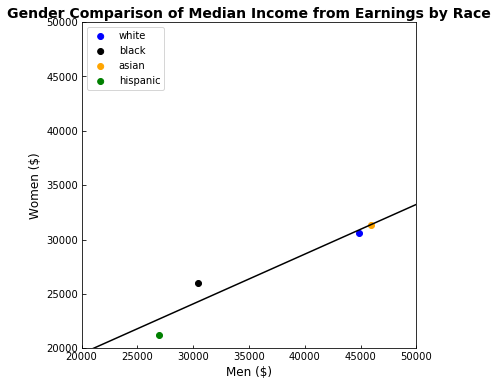

In [24]:
best_fit = np.polyfit(male_earnings, female_earnings, 1)
print(best_fit)
p = np.poly1d(best_fit)
print(p)

pl.figure(figsize = (6, 6))
xp = np.linspace(20000, 50000, 100)
pl.plot(xp, p(xp), '-', color = 'black')
pl.scatter(male_vars['median_males_white'], female_vars['median_females_white'], label = 'white', color = 'blue')
pl.scatter(male_vars['median_males_black'], female_vars['median_females_black'], label = 'black', color = 'black')
pl.scatter(male_vars['median_males_hispanic'], female_vars['median_females_hispanic'], label = 'asian', color = 'orange')
pl.scatter(male_vars['median_males_asian'], female_vars['median_females_asian'], label = 'hispanic', color = 'green')
pl.legend(loc = 'upper left')
pl.title('Gender Comparison of Median Income from Earnings by Race', fontsize = 14, fontweight = 'bold') 
pl.xlabel('Men ($)', fontsize = 12)
pl.ylabel('Women ($)', fontsize = 12)
pl.axis([20000, 50000, 20000, 50000])

### Plot Description
The plot above shows the median income from 'earnings' of males and females plotted against each other and subdivided by each race's median income. Here, we've plotted the best fit line for this data.

## OLS Regression 

In [25]:
from scipy import stats
all_males_stats = np.array([0., all_males['all']['Median income'][1],
                    all_males['white']['Median income'][1],
                    all_males['black']['Median income'][1],
                     all_males['hisp']['Median income'][1],
                    all_males['asian']['Median income'][1]])

all_females_stats = np.array([0.] + [all_females[k]['Median income'][1] \
                             for k in ['all', 'white', 'black',
                                     'hisp','asian']])

#Spearman's correlation coefficient - nonparametric version of the Pearson correlation. Measures the strength and direction of 
#association between two ranked variables. 
#Info source: https://statistics.laerd.com/statistical-guides/spearmans-rank-order-correlation-statistical-guide.php
cor = stats.spearmanr(all_males_stats, all_females_stats)

#beta1 = slope
beta1 = cor[0] * all_females_stats.std() / all_males_stats.std()


#beta0 = intercept
beta0 = all_females_stats.mean() - beta1 * all_males_stats.mean()
beta0, beta1, cor

(2224.3609760454674,
 0.57394829035421091,
 SpearmanrResult(correlation=0.94285714285714295, pvalue=0.0048046647230320554))

### Interpretation of OLS regression

For the best-fit line of our data, the y-intercept is USD 2224 and the slope is 0.57. This slope tells us that for every dollar a man makes in this dataset, a woman makes 57 cents on average. From the spearman test, we get a correlation coefficient very close to 1, meaning the line is a very good fit of the data. 

[  4.57499819e-01   1.03650611e+04]
 
0.4575 x + 1.037e+04


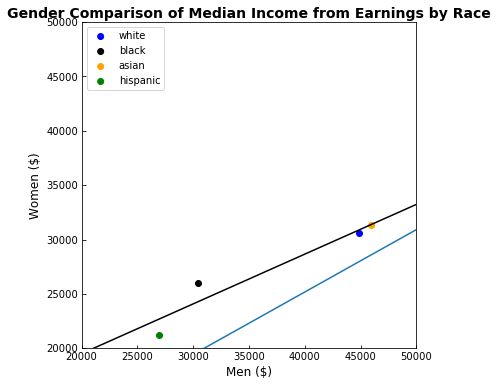

In [33]:
best_fit = np.polyfit(male_earnings, female_earnings, 1)
print(best_fit)
p = np.poly1d(best_fit)
print(p)

pl.figure(figsize = (6, 6))
xp = np.linspace(20000, 50000, 100)
pl.plot(xp, p(xp), '-', color = 'black')
pl.scatter(male_vars['median_males_white'], female_vars['median_females_white'], label = 'white', color = 'blue')
pl.scatter(male_vars['median_males_black'], female_vars['median_females_black'], label = 'black', color = 'black')
pl.scatter(male_vars['median_males_hispanic'], female_vars['median_females_hispanic'], label = 'asian', color = 'orange')
pl.scatter(male_vars['median_males_asian'], female_vars['median_females_asian'], label = 'hispanic', color = 'green')
pl.legend(loc = 'upper left')
pl.title('Gender Comparison of Median Income from Earnings by Race', fontsize = 14, fontweight = 'bold') 
pl.xlabel('Men ($)', fontsize = 12)
pl.ylabel('Women ($)', fontsize = 12)
pl.axis([20000, 50000, 20000, 50000])


# FBB until here it was fine then you got confused. See cell below

#Plotting linear line
#Source: http://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
x = np.arange(20000, 50000)
y = beta1 * x + beta0
m, b = np.polyfit(x, y, 1)
pl.plot(x, m * x + b, '-') 

[  4.57499819e-01   1.03650611e+04]
 
0.4575 x + 1.037e+04


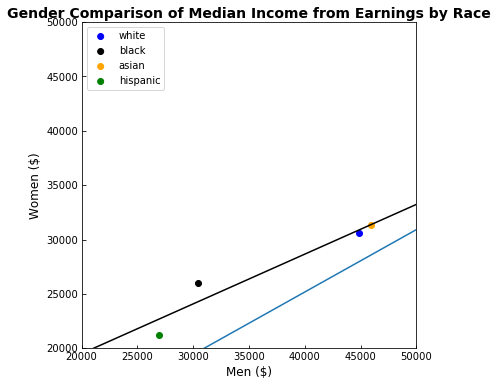

In [35]:
best_fit = np.polyfit(male_earnings, female_earnings, 1)
print(best_fit)
p = np.poly1d(best_fit)
print(p)

pl.figure(figsize = (6, 6))
xp = np.linspace(20000, 50000, 100)
pl.plot(xp, p(xp), '-', color = 'black')
pl.scatter(male_vars['median_males_white'], female_vars['median_females_white'], label = 'white', color = 'blue')
pl.scatter(male_vars['median_males_black'], female_vars['median_females_black'], label = 'black', color = 'black')
pl.scatter(male_vars['median_males_hispanic'], female_vars['median_females_hispanic'], label = 'asian', color = 'orange')
pl.scatter(male_vars['median_males_asian'], female_vars['median_females_asian'], label = 'hispanic', color = 'green')
pl.legend(loc = 'upper left')
pl.title('Gender Comparison of Median Income from Earnings by Race', fontsize = 14, fontweight = 'bold') 
pl.xlabel('Men ($)', fontsize = 12)
pl.ylabel('Women ($)', fontsize = 12)
pl.axis([20000, 50000, 20000, 50000])

#Plotting linear line
#Source: http://stackoverflow.com/questions/19068862/how-to-overplot-a-line-on-a-scatter-plot-in-python
# YOU ALReADY HAVE SLOPE AND INTERCEPT YOU DO NOT NEED TO FIT THE DATA AGAIN!
pl.plot(xp, beta1 * xp + beta0, '-')



### Plot Description
The plot above shows the median income from 'earnings' of males and females plotted against each other and subdivided by each race's median income. Here, we've plotted two regression lines for this data: the black representing the best fit line from before, and the blue the analytical solution from the OLS regression calculations. If this was done correctly, it appears the analytical solution does not fit the data very well. 

# FBB it looks wrong because the analytical solution you got from the skeleton notebook fits the mean, but you are fitting the standard deviations. YOu read in the wrong datapoints

## Median Incomes: All income types (All characteristis)

In [87]:
median_m = {'all':[elem for elem in all_males['all']['Median income']], 'white':[elem for elem in all_males['white']['Median income']], 'black':[elem for elem in all_males['black']['Median income']], 'hisp':[elem for elem in all_males['hisp']['Median income']], 'asian':[elem for elem in all_males['asian']['Median income']]}
median_f = {'all':[elem for elem in all_females['all']['Median income']], 'white':[elem for elem in all_females['white']['Median income']], 'black':[elem for elem in all_females['black']['Median income']], 'hisp':[elem for elem in all_females['hisp']['Median income']], 'asian':[elem for elem in all_females['asian']['Median income']]}

In [89]:
median_white = pd.DataFrame()
median_white['white_male'] = median_m['white']
median_white['white_female'] = median_f['white']
dropped_white = median_white.dropna()

median_all = pd.DataFrame()
median_all['all_male'] = median_m['all']
median_all['all_female'] = median_f['all']
dropped_all = median_all.dropna()

median_black = pd.DataFrame()
median_black['black_male'] = median_m['black']
median_black['black_female'] = median_f['black']
dropped_black = median_black.dropna()

median_hispanic = pd.DataFrame()
median_hispanic['hispanic_male'] = median_m['hisp']
median_hispanic['hispanic_female'] = median_f['hisp']
dropped_hispanic = median_hispanic.dropna()

median_asian = pd.DataFrame()
median_asian['asian_male'] = median_m['asian']
median_asian['asian_female'] = median_f['asian']
dropped_asian = median_asian.dropna()

In [90]:
import itertools

median_all_dropped = pd.DataFrame()
median_all_dropped['all_males'] = all_males['all']['Median income']
median_all_dropped['white_males'] = all_males['white']['Median income']
median_all_dropped['black_males'] = all_males['black']['Median income']
median_all_dropped['hispanic_males'] = all_males['hisp']['Median income']
median_all_dropped['asian_males'] = all_males['asian']['Median income']
median_all_dropped['all_females'] = all_females['all']['Median income']
median_all_dropped['white_females'] = all_females['white']['Median income']
median_all_dropped['black_females'] = all_females['black']['Median income']
median_all_dropped['hispanic_females'] = all_females['hisp']['Median income']
median_all_dropped['asian_females'] = all_females['asian']['Median income']
df = median_all_dropped.dropna()
male_list = []
for i in range(0,5):
    for elem in [df.ix[:, i]]:
        male_list.append(elem.tolist())
male_merged = np.array(list(itertools.chain(*male_list)))

female_list = []
for i in range(5,10):
    for elem in [df.ix[:, i]]:
        female_list.append(elem.tolist())
female_merged = np.array(list(itertools.chain(*female_list)))

In [91]:
best_fit = np.polyfit(male_merged, female_merged, 1)
print(best_fit)
k = np.poly1d(best_fit)
print(k)

[  6.45502835e-01   1.19800954e+03]
 
0.6455 x + 1198


In [92]:
cor_new = stats.spearmanr(male_merged, female_merged)

beta1_new = cor[0] * female_merged.std() / male_merged.std()

beta0_new = female_merged.mean() - beta1 * male_merged.mean()
beta0_new, beta1_new, cor_new

(2260.1211301289513,
 0.62419296925730872,
 SpearmanrResult(correlation=0.96068964775788868, pvalue=2.621519979932312e-70))

In [93]:
#Source: http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html
slope, intercept, r_value, p_value, slope_std_error = stats.linregress(male_merged, female_merged)
predict_y = intercept + slope * male_merged

In [94]:
total_median_income_male = []
total_median_income_female = []

for i in range(1,len(keys)): 
    total_median_income_male.append(all_males[keys[i]].ix[1]['Median income'])
for i in range(1,len(keys)): 
    total_median_income_female.append(all_females[keys[i]].ix[1]['Median income'])
print(total_median_income_male)
print(total_median_income_female)

[40122.0, 24855.0, 40153.0, 25411.0]
[23780.0, 20044.0, 24840.0, 17762.0]


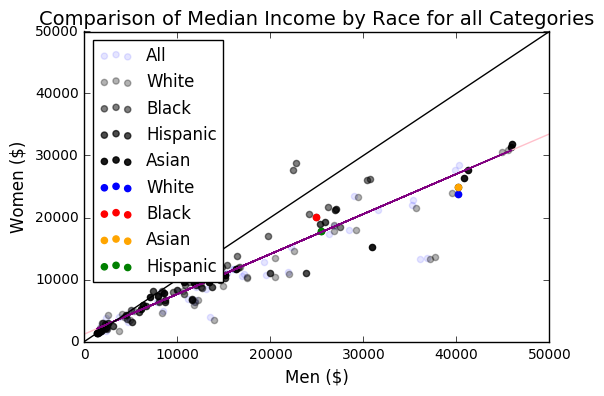

In [110]:
pl.scatter(dropped_all['all_male'], dropped_all['all_female'], label = 'All', color = 'blue', alpha = 0.1)
pl.scatter(dropped_white['white_male'], dropped_white['white_female'], label = 'White', color = 'black', alpha = 0.3)
pl.scatter(dropped_black['black_male'], dropped_black['black_female'], label = 'Black', color = 'black', alpha = 0.5)
pl.scatter(dropped_hispanic['hispanic_male'], dropped_hispanic['hispanic_female'], label = 'Hispanic', color = 'black', alpha = 0.7)
pl.scatter(dropped_asian['asian_male'], dropped_asian['asian_female'], label = 'Asian', color = 'black', alpha = 0.9)
pl.scatter(total_median_income_male[0], total_median_income_female[0], label = 'White', color = 'blue')
pl.scatter(total_median_income_male[1], total_median_income_female[1], label = 'Black', color = 'red')
pl.scatter(total_median_income_male[2], total_median_income_female[2], label = 'Asian', color = 'orange')
pl.scatter(total_median_income_male[3], total_median_income_female[3], label = 'Hispanic', color = 'green')
pl.xlabel('Men ($)', fontsize = 12)
pl.ylabel('Women ($)', fontsize = 12)
pl.axis([0, 50000, 0, 50000])
pl.legend(loc = 'upper left')
pl.title('Comparison of Median Income by Race for all Categories', fontsize = 14)

xk = np.linspace(0, 50000, 100)
pl.plot(xk, k(xk), '-', color = 'pink')
pl.plot(male_merged, predict_y, '-', color = 'purple')
pl.plot([i for i in range(0,50000)], [i for i in range(0,50000)], color = 'black', label = '1:1')

### Plot Description
The plot above shows the median income from all income types (or characteritsics) of males and females plotted against each other and subdivided by each race's median income. Here, we've plotted two regression lines for this data: the pink representing the best fit line, and the purple the linear regression. The black line shows the 1:1 line representing what the data would look like if males and females were given equal pay across this dataset. 

## Predict Woman's Salary given Man's Salary

Chosen stipend: USD 80,000

In [108]:
female_salary = intercept + slope*80000
female_salary

52838.23636682154

Conclusion: Given a male salary of USD 80,000 a woman would be expected to make USD 52,838.

## What this data tells us about race

I think the most interesting observation about race from this data is the comparison of income amount and income disparity between genders. Specifically, those who are white or asian tend to make more money in general than those who are black or hispanic, but the income disparity by gender is much larger. In contrast, those who are black or hispanic make less money than the other races in general, but their income disparity is less. It seems, then, that more than just males in general, it is white males specifically who are making more money than both women and other races in general. From the graph, we can see that black males and females have the least income disparity - this could be because this race group in general is paid less fairly, and that being a male doesn't necessarily mean a higher paycheck when considering racial differences. I would thus perform statisical analysis to see if there are significant differences when normalized by race. 

# FBB  that is true, but ethnicity is covariant with income, which  invalidate the first part of the analysis and may invalidate the second the analysis (see my solution)
